# Лабораторная работа №2.
## Малютин Александр БПМ152.
### Вариант 20.

In [8]:
from sympy.solvers import solve
from sympy import Symbol, diff, sqrt, cos, sin
from scipy.misc import derivative

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from IPython.display import Image

Определим необходимые для решения задач методы

In [9]:
def BisecMethod(f, a, b, eps):
    n = 0
    A = a
    B = b
    while (B-A) >= 2 * eps:
        n = n + 1
        x = (A+B)/2
        if f(x)*f(A) < 0:
            B = x
        elif f(x)*f(B) < 0:
            A = x
    return x, n

In [10]:
def NewtoonMethod(f, x, eps):
    n = 1
    x_old = x
    x_new = x_old - f(x_old)/derivative(f,x_old,dx = eps)
    while abs(x_new - x_old) >= eps:
        x_old = x_new
        x_new = x_old - f(x_old)/derivative(f,x_old,dx = eps)
        n = n + 1
    return x_new, n

In [11]:
def SimpleIterationMethod(phi, f, x, q, eps):
    n = 1
    x_old = x
    x_new = phi(x_old, f)
    while abs(x_new - x_old) >= (1 - q)/q * eps:
        x_old = x_new
        x_new = phi(x_old,f)
        n = n + 1
    return x_new, q, n

Чтобы найти ответы встроеными методами:

In [12]:
x = Symbol('x')

## Задание №1

Задача 2.1.
Даны два уравнения f (x) = 0 и g (x) = 0. Найти с точностью $\epsilon=10^{-10}$ все корни уравнений, содержащиеся на отрезке[a, b].Для решения задачи использовать метод бисекции.Найти корни с помощью встроенной функции root пакета MATHCAD.ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ : 
1. Найти аналитическое решение уравнения f (x) = 0.
2. Используя пакет MATHCAD, локализовать корни f (x) = 0 графически.
3. Используя программу bisec (см.ПРИЛОЖЕНИЕ 2. B), найти корни уравнения f (x) = 0 с точностью с помощью метода бисекции.
4. Используя встроенную функции root пакета MATHCAD, найти корни уравнения f (x) = 0 с точностью. 
5. Аналогично п .1 - 4 попытаться найти корни уравнения g (x) = 0. Объяснить полученные результаты.

$$ (\cos{x})^{2} + \bigg(\frac{1}{\sqrt{2}}-\frac{1}{4}\bigg)\cos{x} - \frac{1}{4\sqrt{2}}$$

$$ (\cos{x})^{2} - \frac{1}{2}\cos{x} + \frac{1}{16} $$

$$x\in[0,2]$$

In [13]:
def f1(x):
    return cos(x)**2 + (1/sqrt(2) - 1/4) * cos(x) - 1/(4 * sqrt(2))
def g1(x):
    return cos(x)**2 - 1/2 * cos(x) + 1/16

eps1 = 10**(-10)
a1 = 0
b1 = 2

Найдем корни уравнения $f(x) = 0$ встроеными методами:

In [14]:
roots1 = np.array(solve(f1(x), x))
roots1 = roots1[roots1 > 0]
roots1 = roots1[roots1 < 2]
roots1

array([1.31811607165282], dtype=object)

График функции $f(x)$:

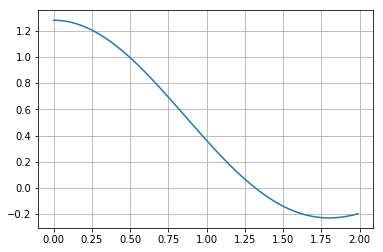

In [15]:
X = np.arange(a1, b1, 0.01)
Y = np.array([f1(k) for k in X])

fig = plt.figure()
plt.grid(True)
plt.plot(X, Y)
plt.show() 

Из графика поулчаем что отрезок локализации [1.25; 1.5]

In [16]:
x11 = BisecMethod(f1, 1.25, 1.5, eps1)
x11

(1.31811607175041, 31)

Построим график функции $g(x)$:

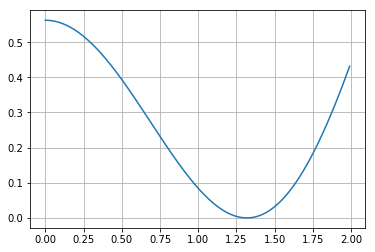

In [17]:
Y = np.array([g1(k) for k in X])

fig = plt.figure()
plt.grid(True)
plt.plot(X, Y)
plt.show()

Имеем корень четной кратности, следовательно не можем применить метод бисекции.

## Задание №2

Найти указанный в варианте  корень уравнения $f(x)=0$ с точностью $\epsilon=10^{-6}$,  двумя  способами.

а) Использовать метод бисекции. Предварительно определить отрезок локализации $[a, b]$.

b) Использовать метод Ньютона. В качестве начального приближения для метода Ньютона взять  середину отрезка локализации из п. а).
      
Сравнить число итераций в п. a), b). 

##### 2.2.5 
$\sqrt{x}-\cos{x}$   
##### все корни


In [18]:
def f2(x):
    return sqrt(x) - cos(x)

eps2 = 10**(-6)

Найдем корни уравнения $f(x) = 0$ встроеными методами:

In [19]:
#roots2 = np.array(solve(f2(x), x))
#roots2

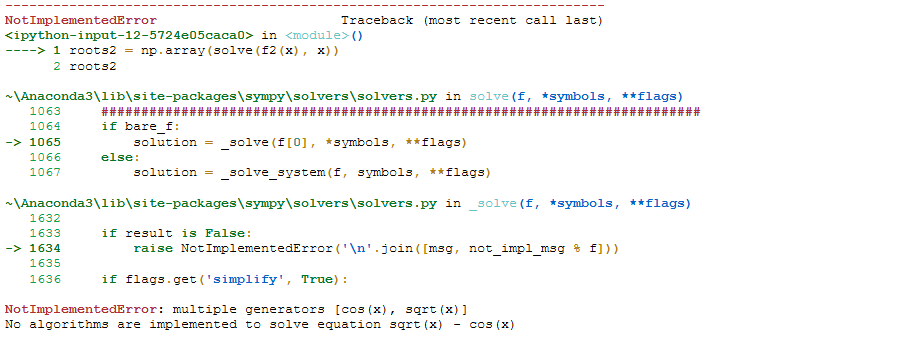

In [20]:
Image("img/image2251.png")

Встроенный метод не справляется :( поэтому вот ответ из Wольфрама:

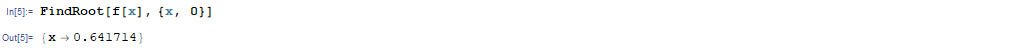

In [21]:
Image("img/image2252.png")

Построим график функции:

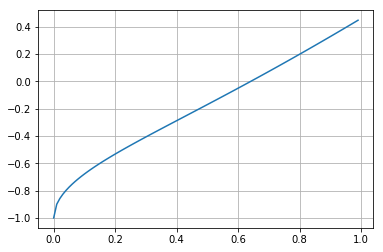

In [22]:
X = np.arange(0, 1,0.01)
Y = np.array([f2(k) for k in X])

fig = plt.figure()
plt.grid(True)
plt.plot(X, Y)
plt.show()

Из графика: возьмем отрезок локализации как [0.6; 0.8]

In [23]:
print(NewtoonMethod(f2, 0.75, eps2))
print(BisecMethod(f2, 0.6, 0.8, eps2))

(0.641714370872896, 3)
(0.6417129516601562, 17)


Число итераций у метода Ньютона << чем у метода бисекции => метод Ньютона сходится быстрее.

## Задание №3.5

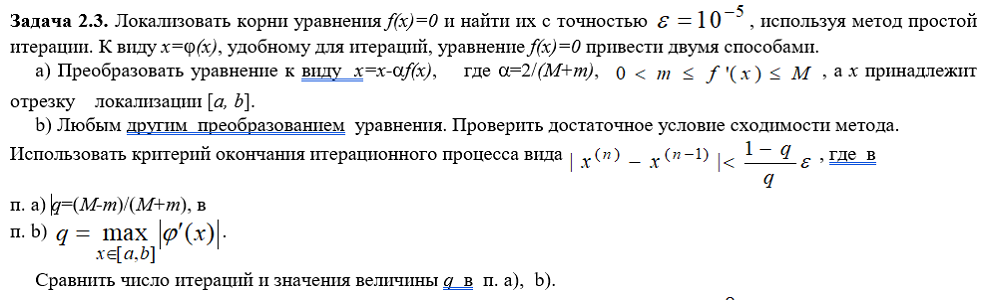

In [24]:
Image("img/image23.png")

$$\large x-e^{-x^2}$$

In [25]:
def f3(x):
    return x - np.e**(-x**2)

eps3 = 10**(-5)

### График:

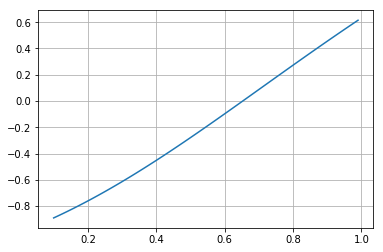

In [26]:
X = np.arange(0.1, 1, 0.01)

fig = plt.figure()
plt.grid(True)
plt.plot(X, f3(X))
plt.show() 

Из графика возьмем отрезок локализации как [0.6; 0.8]

Определим константы m и M.

Определим производную функции:

In [27]:
def df3(x):
    return 1 + 2 * x * (np.e**(-(x**2)))

График производной:

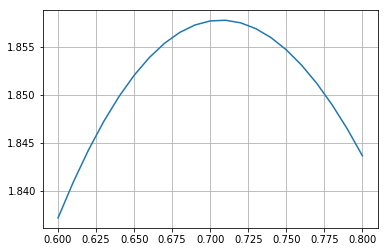

In [28]:
X = np.arange(0.6, 0.8, 0.01)

fig = plt.figure()
plt.grid(True)
plt.plot(X, df3(X))
plt.show() 

In [29]:
m = min([df3(k) for k in X])
M = max([df3(k) for k in X])
print(m, M)

1.8372115912852371 1.857749544411996


#### Определим $q$: 
a) $q=(M-m)/(M+m)$ 

In [30]:
q = (M-m)/(M+m)
q

0.00555836783460062

Определим функцию $\phi$

In [31]:
def phi1(x, f):
    return x - 2/(M + m) * f(x)

Ответ:

In [32]:
print("(x, q, n) = ", SimpleIterationMethod(phi1, f3, 0.8, q, eps3))

(x, q, n) =  (0.6529200936946217, 0.00555836783460062, 2)


b) Выберем $\alpha = \frac{1}{f'(x_0)}$. И получим метод Ньютона.

Определим $\phi$ и $\phi'$:

In [33]:
def phi2(x, f):
    return x - 1/df3(0.8) * f(x)

def dphi2(x, f):
    return 1 - 1/df3(0.8) * f(x)

Найдём $q$:

$b) \space q=\max\limits_{x\in[a,b]}|\phi'(x)|$
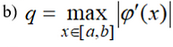

In [34]:
q2 = max([dphi2(k, df3) for k in X])
q2

0.003501871057710493

Ответ:

In [35]:
SimpleIterationMethod(phi2, f3, 0.8, q2, eps3)

(0.6529226489464242, 0.003501871057710493, 2)

Сравним его с настоящим методом Ньютона:

In [36]:
NewtoonMethod(f3, 0.8, eps3)

(0.6529186404192048, 3)

Вывод: Ответы ~совпали с точностью $\epsilon => $ Супер!